In [28]:
%pylab notebook
from modules.simulate import cluster_templates as cltemp
from modules.settings import mmf_settings as mmfset
from modules.simulate.spatial_template import sim_cluster as sc
from modules.cosmology import cosmo_fn as clcosmo
from modules.flat_sky_codes import flat_sky_analysis as fsa
from modules.filters import modular_multi_matched_filter as mmf
from modules.masking import gen_masks as gm
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


# Initialize analysis

In [31]:
mmfset.init()
tmplt=cltemp.cluster_spectro_spatial_templates(T_step=1.,T_max=50.)
tmplt.setup_templates()
op=mmf.multi_matched_filter(tmplt.sp_ft_bank,tmplt.sz_spec_bank,tmplt.chfiltr,tmplt.fn_yerr_norm)
emask=gm.return_edge_apodized_mask()

# Simulate multi-frequency cluster maps

In [32]:
Tc=12. ; redshift=0.6
thetac=clcosmo.convert_T500_theta500(Tc,redshift)
template=sc.gen_cluster_template(mmfset.npix,thetac,mmfset.reso,y0=1e-4)
temp_ft=fsa.map2alm(template,mmfset.reso)

template_ft=np.zeros((np.size(mmfset.channels),mmfset.npix,mmfset.npix),complex)
cluster=np.zeros((np.size(mmfset.channels),mmfset.npix,mmfset.npix),float)
for i, ch in enumerate(mmfset.channels):
    template_ft[i,:,:]=temp_ft*tmplt.chfiltr[ch]*tmplt.sz_spec_bank[Tc][ch]
    cluster[i,:,:]=fsa.alm2map(template_ft[i,:,:],mmfset.reso)

<IPython.core.display.Javascript object>


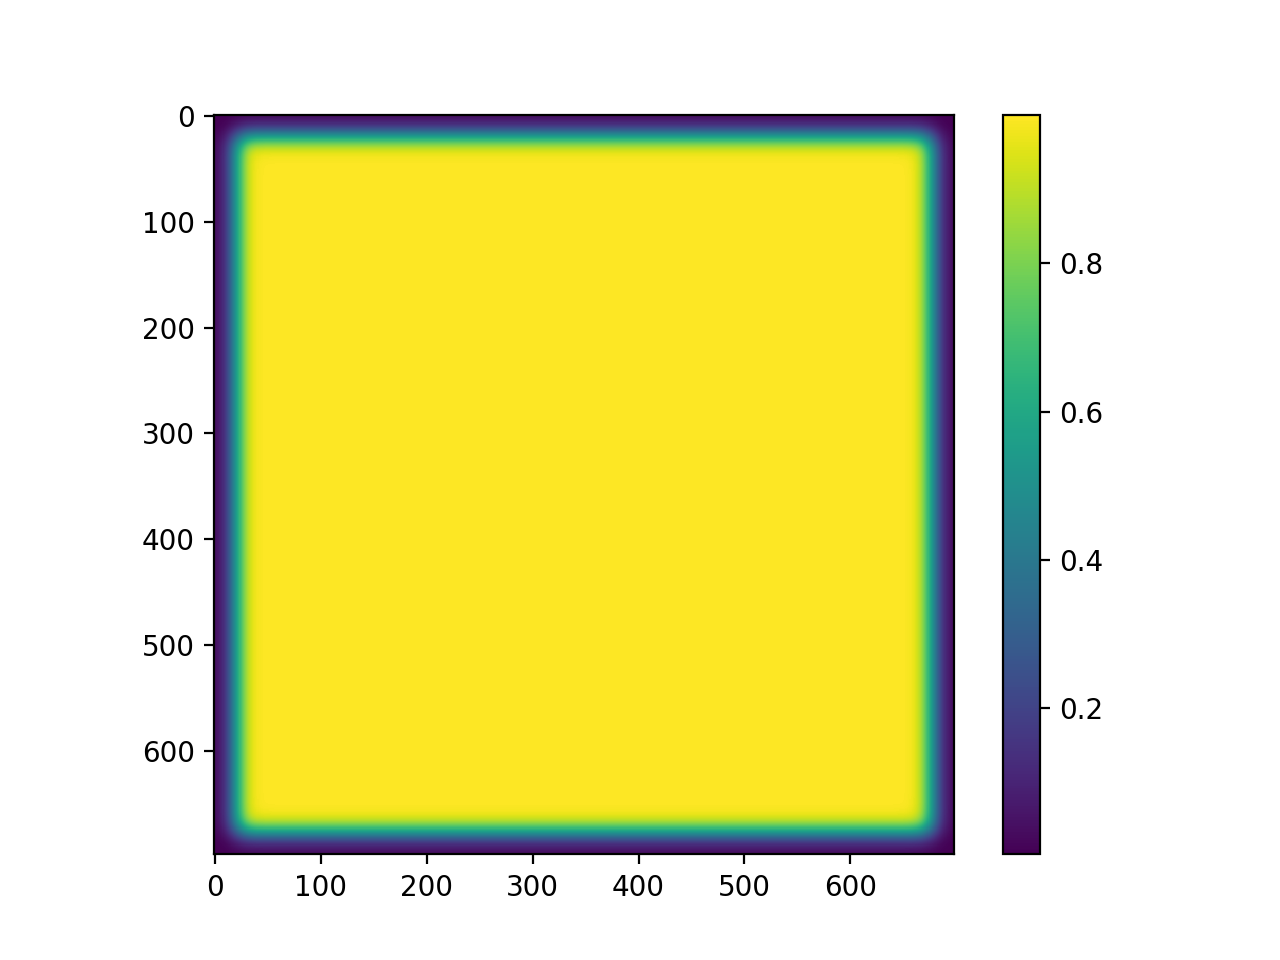

In [30]:
figure()
imshow(emask)
colorbar()